### Definicion del problema

Problema de la coloración mínima: suponga que tiene una paleta de 36 colores y
quiere colorear un mapa de la República Argentina
formado por 23 provincias. La restricción que se impuso
es que dos provincias adyacentes no pueden tener el
mismo color. Encuentre la cantidad mínima de colores
que debe usarse para poder cumplir con la restricción.


In [1]:
import pandas as pd
import numpy as np
import pygad
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.io.shapereader import Reader as sf
from cartopy.feature import ShapelyFeature as cfeature

In [2]:
class Provincia:
    def __init__(self, id, nombre, color, provincias_adyacentes=[]):
        self.id = id
        self.nombre = nombre
        self.color = color
        self.provincias_adyacentes = provincias_adyacentes

    def __str__(self):
        return f"Provincia ID: {str(self.id)}, Nombre: {self.nombre}, Color:{self.color}, Provincias Adyacentes: {','.join(str(v) for v in self.provincias_adyacentes)}"

In [3]:
provincias = [
    'Neuquen', 'San Luis', 'Santa Fe', 'La Rioja', 'Catamarca',
    'Tucuman', 'Chaco', 'Formosa', 'Santa Cruz', 'Chubut', 'Mendoza', 'Entre Rios', 'San Juan', 
    'Jujuy', 'Santiago del Estero', 'Rio Negro', 'Corrientes', 'Misiones', 'Salta', 'Cordoba', 
    'Buenos Aires', 'La Pampa', 'Tierra del Fuego'
]

provinciasSerie = pd.Series(provincias)

provinciasSerie

0                 Neuquen
1                San Luis
2                Santa Fe
3                La Rioja
4               Catamarca
5                 Tucuman
6                   Chaco
7                 Formosa
8              Santa Cruz
9                  Chubut
10                Mendoza
11             Entre Rios
12               San Juan
13                  Jujuy
14    Santiago del Estero
15              Rio Negro
16             Corrientes
17               Misiones
18                  Salta
19                Cordoba
20           Buenos Aires
21               La Pampa
22       Tierra del Fuego
dtype: object

In [4]:
adyacentes = {
    "Neuquen": [10, 15, 21],
    "San Luis": [3, 10, 12, 19, 21],
    "Santa Fe": [6, 11, 14, 16, 19, 20],
    "La Rioja": [1, 4, 12, 19],
    "Catamarca": [3, 5, 14, 18, 19],
    "Tucuman": [4, 14, 18],
    "Chaco": [2, 7, 14, 16, 18],
    "Formosa": [6, 18],
    "Santa Cruz": [9, 22],
    "Chubut": [8, 15],
    "Mendoza": [0, 1, 12, 15, 21],
    "Entre Rios": [2, 16, 20],
    "San Juan": [1, 3, 10],
    "Jujuy": [18],
    "Santiago del Estero": [2, 4, 5, 6, 18, 19],
    "Rio Negro": [0, 9, 10, 20, 21],
    "Corrientes": [2, 6, 11, 17],
    "Misiones": [16],
    "Salta": [4, 5, 6, 7, 13, 14],
    "Cordoba": [1, 2, 3, 4, 14, 20, 21],
    "Buenos Aires": [2, 11, 15, 19, 21],
    "La Pampa": [0, 1, 10, 15, 19, 20],
    "Tierra del Fuego": [8]
}

adyacentesSerie = pd.Series(adyacentes)

adyacentesSerie

Neuquen                            [10, 15, 21]
San Luis                    [3, 10, 12, 19, 21]
Santa Fe                [6, 11, 14, 16, 19, 20]
La Rioja                         [1, 4, 12, 19]
Catamarca                    [3, 5, 14, 18, 19]
Tucuman                             [4, 14, 18]
Chaco                        [2, 7, 14, 16, 18]
Formosa                                 [6, 18]
Santa Cruz                              [9, 22]
Chubut                                  [8, 15]
Mendoza                      [0, 1, 12, 15, 21]
Entre Rios                          [2, 16, 20]
San Juan                             [1, 3, 10]
Jujuy                                      [18]
Santiago del Estero        [2, 4, 5, 6, 18, 19]
Rio Negro                    [0, 9, 10, 20, 21]
Corrientes                       [2, 6, 11, 17]
Misiones                                   [16]
Salta                      [4, 5, 6, 7, 13, 14]
Cordoba                [1, 2, 3, 4, 14, 20, 21]
Buenos Aires                [2, 11, 15, 

In [5]:
colores = [
    "#FF0000",  # Rojo
    "#00FF00",  # Verde
    "#0000FF",  # Azul
    "#FFFF00",  # Amarillo
    "#00FFFF",  # Cian
    "#FF00FF",  # Magenta
    "#800000",  # Rojo oscuro
    "#008000",  # Verde oscuro
    "#000080",  # Azul oscuro
    "#808000",  # Amarillo oscuro
    "#008080",  # Cian oscuro
    "#800080",  # Magenta oscuro
    "#C0C0C0",  # Gris claro
    "#808080",  # Gris medio
    "#404040",  # Gris oscuro
    "#FF8000",  # Naranja
    "#80FF00",  # Lima
    "#0080FF",  # Azul claro
    "#FF0080",  # Rosa
    "#8000FF",  # Púrpura
    "#FF8080",  # Rosa claro
    "#80FF80",  # Verde claro
    "#8080FF",  # Azul claro
    "#FFFF80",  # Amarillo claro
    "#FF80FF",  # Lila
    "#80FFFF",  # Turquesa
    "#C00000",  # Rojo oscuro 2
    "#00C000",  # Verde oscuro 2
    "#0000C0",  # Azul oscuro 2
    "#C0C000",  # Amarillo oscuro 2
    "#00C0C0",  # Cian oscuro 2
    "#C000C0",  # Magenta oscuro 2
    "#FFC080",  # Melocotón
    "#80FFC0",  # Verde menta
    "#C080FF"   # Lila claro
]

In [6]:
# Inicializar provincias
# listaProvincias = []
# for ix, provincia in enumerate(adyacentes):
#     listaProvincias.append(Provincia(ix, provincia, colores[ix], adyacentes[provincia]))

# for provincia in listaProvincias:
#     print(provincia)


In [7]:
def cant_adyacencias(solution):
    cantidad_colores_iguales_adyacentes = 0
    for i_provincia, color in enumerate(solution):
        for provincia_adyacente in adyacentes[provincias[i_provincia]]:
            # Ver si tengo una provincia adyacente que tiene mi mismo valor
            if color == solution[provincia_adyacente]:
                cantidad_colores_iguales_adyacentes += 1
                
    return cantidad_colores_iguales_adyacentes / 2

def fitness_func(ga_instance, solution, solution_idx):
    cantidad_colores_iguales_adyacentes = cant_adyacencias(solution)

    colores_unicos = len(set(solution))

    return 1 / (cantidad_colores_iguales_adyacentes*4 + colores_unicos)
    

In [8]:
fitness_function = fitness_func

num_generations = 10000
num_parents_mating = 8

sol_per_pop = 16
num_genes = len(provincias)

init_range_low = 0
init_range_high = 35

parent_selection_type = "sss"
keep_parents = 1
keep_elitism = 2

crossover_type = "single_point"
crossover_probability = 0.9

mutation_type = "random"
mutation_percent_genes = 10
mutation_probability = 0.3

gene_type=np.int16

In [9]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       keep_elitism=keep_elitism,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       mutation_probability=mutation_probability,
                       gene_type=gene_type)

In [10]:
ga_instance.run()

In [11]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Colores de la mejor solution : {solution}".format(solution=solution))
print("Valor de fitness de la mejor solucion = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Cantidad de colores = {cantidad_colores}".format(cantidad_colores=len(set(solution))))
print("Cantidad de adayacencias = {cantidad_adayacencias}".format(cantidad_adayacencias=cant_adyacencias(solution)))

Colores de la mejor solution : [9 4 3 1 0 2 0 1 0 9 1 1 0 0 1 2 2 0 9 2 0 3 1]
Valor de fitness de la mejor solucion = 0.16666666666666666
Cantidad de colores = 6
Cantidad de adayacencias = 0.0


In [12]:
#El archivo shp lo pueden encontrar en la página del Instituto Geográfico Nacional (IGN)
fname = 'provincia/provincia.shp'
country = sf(fname)

solution = np.insert(solution, 0, solution[20])
coloresEnRGB = [colores[i] for i in solution]


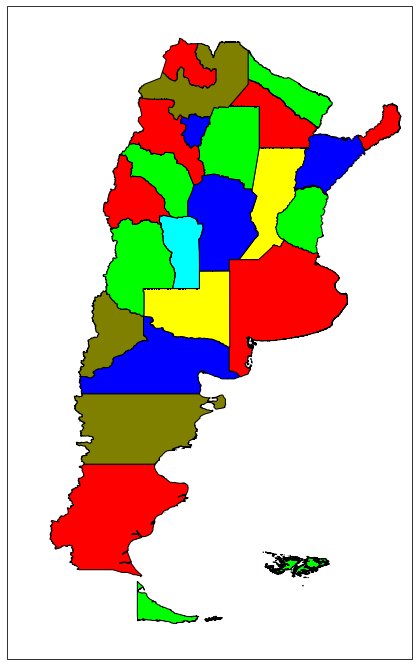

In [13]:
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=[12,12])

for province, color in zip(country.records(), coloresEnRGB):
    ax.add_geometries(province.geometry, crs=ccrs.PlateCarree(), facecolor=color, edgecolor='black', zorder=1)

#Defino los ejes (lon min y max, lat min y max)
ax.set_extent([-76, -53, -57, -20])